# <u><font color='darkblue'>IPL Data (Exploratory Analysis)<font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Contains 2 datasources. Lets import them one by one and clean them.

In [2]:
matches=pd.read_csv(r"C:\Users\soura\OneDrive\Documents\Tableau Data\matches.csv")

In [3]:
pd.set_option("display.max_columns",50)

In [4]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Match_winner,Ground score,Unnamed: 20,Sunrisers Hyderabad
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,High,NaN,Mumbai Indians
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,Medium,NaN,Gujarat Lions
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,Low,NaN,Rising Pune Supergiant
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,0,NaN,Royal Challengers Bangalore
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0,NaN,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,1,NaN,NaN,NaN
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,1,NaN,NaN,NaN
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,0,NaN,NaN,NaN
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,1,NaN,NaN,NaN


In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'Match_winner', 'Ground score', 'Unnamed: 20',
       'Sunrisers Hyderabad'],
      dtype='object')

In [6]:
match=matches[['id', 'season', 'city', 'date','team1', 'team2','toss_winner',
       'toss_decision','winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue']]

In [7]:
match=match.dropna(how="all")
match=match.drop_duplicates()

In [8]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   winner           633 non-null    object
 9   win_by_runs      636 non-null    int64 
 10  win_by_wickets   636 non-null    int64 
 11  player_of_match  633 non-null    object
 12  venue            636 non-null    object
dtypes: int64(4), object(9)
memory usage: 69.6+ KB


### Some matches don't seems to have any winner. Lets check them. Also, I checked about those matches on internet and they ended in "NO RESULT" due to RAIN. So, lets just set the winner as no result.

In [9]:
match[match["winner"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,NaN,0,0,NaN,M Chinnaswamy Stadium


In [10]:
match.loc[match["winner"].isnull(),"winner"]="no result"

### Also, some city names are not mentioned where the match took place. Again, we checked for those matches on internet and we found a strange thing, all those matches were played in Dubai! So, lets just put that data in!

In [11]:
match[match["city"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [12]:
match.loc[match["city"].isnull(),"city"]="Dubai"

In [13]:
match["date"]=pd.to_datetime(match["date"])

In [14]:
match["team1"].value_counts()

Mumbai Indians                 82
Chennai Super Kings            77
Kings XI Punjab                77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [15]:
match.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)

In [16]:
match["team2"].value_counts()

Delhi Daredevils               84
Royal Challengers Bangalore    82
Kolkata Knight Riders          80
Mumbai Indians                 75
Kings XI Punjab                71
Rajasthan Royals               63
Chennai Super Kings            54
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiants        15
Kochi Tuskers Kerala            7
                                1
Name: team2, dtype: int64

In [17]:
match.loc[match["team2"]==" ","team2"]="Rajasthan Royals"

In [18]:
match["toss_winner"].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

In [19]:
match["toss_decision"].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

In [20]:
match["winner"].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
no result                       3
Name: winner, dtype: int64

In [21]:
deliveries=pd.read_csv(r"C:\Users\soura\OneDrive\Documents\Tableau Data\deliveries.csv",low_memory=False)

In [22]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Bowler type,Over type
0,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,spinner,power play
1,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,spinner,power play
2,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,spinner,power play
3,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,spinner,power play
4,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,spinner,power play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150457,636.0,2.0,Royal Challengers Bangalore,Sunrisers Hyderabad,20.0,4.0,Iqbal Abdulla,Sachin Baby,B Kumar,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
150458,636.0,2.0,Royal Challengers Bangalore,Sunrisers Hyderabad,20.0,5.0,Sachin Baby,Iqbal Abdulla,B Kumar,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
150459,636.0,2.0,Royal Challengers Bangalore,Sunrisers Hyderabad,20.0,6.0,Iqbal Abdulla,Sachin Baby,B Kumar,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN
150460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'Bowler type', 'Over type'],
      dtype='object')

In [24]:
delivery=deliveries[['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'Bowler type']]

In [25]:
delivery=delivery.dropna(how="all")
delivery=delivery.drop_duplicates()

In [26]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150461 entries, 0 to 150461
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          150459 non-null  float64
 1   inning            150459 non-null  float64
 2   batting_team      150459 non-null  object 
 3   bowling_team      150459 non-null  object 
 4   over              150459 non-null  float64
 5   ball              150459 non-null  float64
 6   batsman           150459 non-null  object 
 7   non_striker       150459 non-null  object 
 8   bowler            150459 non-null  object 
 9   is_super_over     150459 non-null  float64
 10  wide_runs         150459 non-null  float64
 11  bye_runs          150459 non-null  float64
 12  legbye_runs       150459 non-null  float64
 13  noball_runs       150459 non-null  float64
 14  penalty_runs      150459 non-null  float64
 15  batsman_runs      150460 non-null  float64
 16  extra_runs        15

In [27]:
delivery[delivery["match_id"].isnull()]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,Bowler type
150460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
150461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [28]:
delivery=delivery.dropna(subset=["match_id"])

In [29]:
delivery["batting_team"].value_counts()

Mumbai Indians                 18942
Royal Challengers Bangalore    17678
Kings XI Punjab                17594
Kolkata Knight Riders          17229
Delhi Daredevils               17185
Chennai Super Kings            15754
Rajasthan Royals               13914
Sunrisers Hyderabad             9058
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [30]:
delivery.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)

In [31]:
delivery["bowling_team"].value_counts()

Mumbai Indians                 18879
Royal Challengers Bangalore    17920
Kolkata Knight Riders          17411
Kings XI Punjab                17392
Delhi Daredevils               17098
Chennai Super Kings            15562
Rajasthan Royals               14111
Deccan Chargers                 9039
Sunrisers Hyderabad             8888
Pune Warriors                   5457
Gujarat Lions                   3545
Rising Pune Supergiants         3543
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64

In [32]:
delivery["dismissal_kind"].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
hit wicket                  9
retired hurt                9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [33]:
delivery["Bowler type"].value_counts()

spinner         13
0               10
medium pacer     7
Name: Bowler type, dtype: int64

In [34]:
delivery.drop("Bowler type",axis=1,inplace=True)

# <u><font color='darkblue'>Exploratory Analysis:<font>


In [35]:
df=match.copy()
df2=delivery.copy()
# df.to_csv("matches_new.csv",index=False)
# df2.to_csv("deliveries_new.csv",index=False)

## <u><font color='darkblue'>First lets see the affects of toss:<font>

### <font color='darkred'>(i) What teams prefer more bat / field first<font>

<AxesSubplot:>

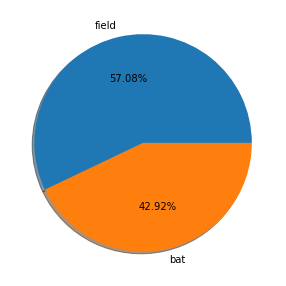

In [36]:
df["toss_decision"].value_counts().plot(kind="pie",ylabel="",figsize=(10,5),shadow=True,autopct='%1.2f%%')

### <font color='darkred'>(ii) How many times Toss winning team won the match

In [37]:
df["TWMW"]=df.apply(lambda row:1 if row["toss_winner"]==row["winner"] else 0,axis=1)

<AxesSubplot:>

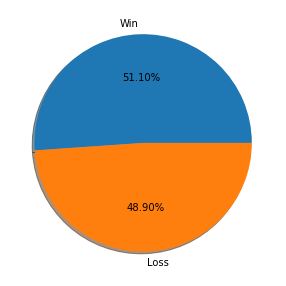

In [38]:
df["TWMW"].value_counts().plot(kind="pie",shadow=True,autopct='%1.2f%%',labels=["Win","Loss"],ylabel="",figsize=(10,5))

### <font color='darkred'>(iii) How many times Toss winning team choose bat / field and won

In [39]:
x=df[df["TWMW"]==1]

<AxesSubplot:>

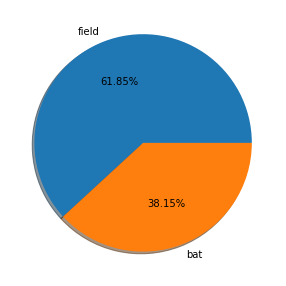

In [40]:
x["toss_decision"].value_counts().plot(kind="pie",ylabel="",figsize=(10,5),shadow=True,autopct='%1.2f%%')

### <font color='darkred'>(iv) Batting First / Bowling First team winning at different venue

In [41]:
def bat_win(row):
    if (row["toss_winner"]==row["winner"]) and (row["toss_decision"]=="bat"):
        return (1)
    elif (row["toss_winner"]!=row["winner"]) and (row["toss_decision"]=="field"):
        return (1)
    else:
        return (0)
    
df["bat FW"]=df.apply(lambda row:bat_win(row),axis=1)
df["ball FW"]=df["bat FW"].apply(lambda x:1 if x==0 else 0)

In [42]:
x=df.pivot_table(index=["venue"],values=["bat FW","ball FW"],aggfunc=sum)

In [43]:
x["total_match"]=x["bat FW"]+x["ball FW"]

In [44]:
x=x[x["total_match"]>=15]

In [45]:
x.sort_values("total_match",ascending=False,inplace=True)

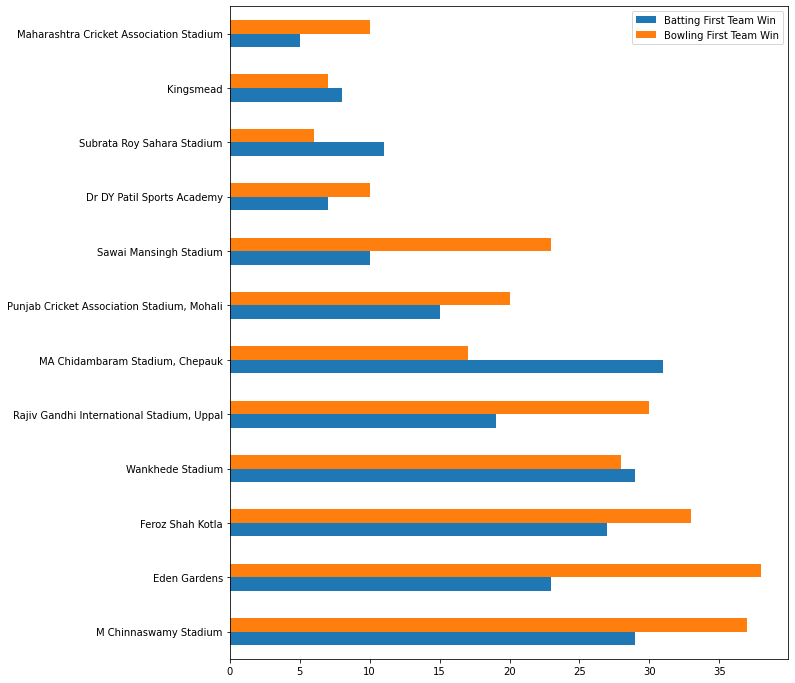

In [46]:
x[["bat FW","ball FW"]].plot(kind="barh",figsize=(10,12),xlabel="")
c=["Batting First Team Win","Bowling First Team Win"]
L=plt.legend()
for i in range(0,len(c)):
    L.get_texts()[i].set_text(c[i])
plt.show()

# <u><font color='darkblue'>Now lets do analysis on other factors:

### <font color='darkred'>➤ Which team won the most matches 

In [47]:
y=df["winner"].value_counts()

In [48]:
y=y.drop("no result",axis=0)

<AxesSubplot:>

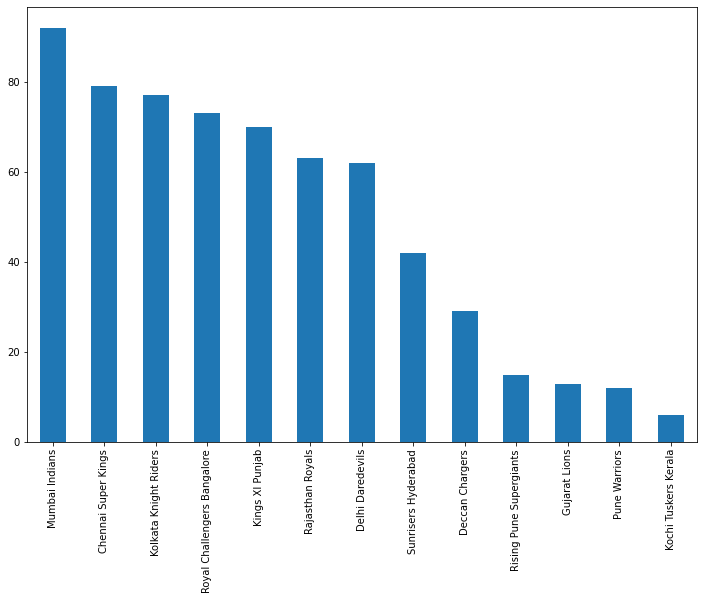

In [49]:
y.plot(kind="bar",figsize=(12,8))

### <font color='darkred'>➤ Average  extras given by each team per match

In [50]:
x=df2.pivot_table(index=["bowling_team"],values=["extra_runs","match_id"],aggfunc={"extra_runs":np.sum,"match_id":pd.Series.nunique})

In [51]:
x["avg_extra"]=x["extra_runs"]/x["match_id"]

In [52]:
x.sort_values("avg_extra",ascending=False,inplace=True)

In [53]:
x.drop(["extra_runs","match_id"],axis=1,inplace=True)

In [54]:
x

,avg_extra
bowling_team,
Rajasthan Royals,8.966102
Mumbai Indians,8.898089
Deccan Chargers,8.786667
Royal Challengers Bangalore,8.668874
Kings XI Punjab,8.310811
Kolkata Knight Riders,8.135135
Delhi Daredevils,8.130137
Kochi Tuskers Kerala,7.857143
Chennai Super Kings,7.648855


### <font color='darkred'>➤ Top 3 highest run scorers each season

In [55]:
x=pd.merge(df2,df,how="left",left_on="match_id",right_on="id")

In [56]:
p=x.pivot_table(index=["season","batsman"],values="batsman_runs",aggfunc=np.sum).reset_index()

In [57]:
p["rank"]=p.groupby(["season"])["batsman_runs"].rank(method="first",ascending=False)

In [58]:
p=p.sort_values(["season","batsman_runs"],ascending=[True,False])

In [59]:
q=p[p["rank"]<=3]

In [60]:
q=q.pivot_table(index=["season","rank","batsman"],values=["batsman_runs"],aggfunc=np.min)

In [61]:
# %%HTML
# <style type="text/css">
# table.dataframe td, table.dataframe th {
#     border: 1px  black solid !important;
#   color: black !important;
# }
# </style>

In [62]:
q

batsman_runs
season rank batsman                     
2008   1.0  SE Marsh               616.0
       2.0  G Gambhir              534.0
       3.0  ST Jayasuriya          514.0
2009   1.0  ML Hayden              572.0
       2.0  AC Gilchrist           495.0
       3.0  AB de Villiers         465.0
2010   1.0  SR Tendulkar           617.0
       2.0  JH Kallis              572.0
       3.0  SK Raina               528.0
2011   1.0  CH Gayle               608.0
       2.0  V Kohli                557.0
       3.0  SR Tendulkar           553.0
2012   1.0  CH Gayle               733.0
       2.0  G Gambhir              590.0
       3.0  S Dhawan               569.0
2013   1.0  MEK Hussey             733.0
       2.0  CH Gayle               720.0
       3.0  V Kohli                639.0
2014   1.0  RV Uthappa             660.0
       2.0  DR Smith               566.0
       3.0  GJ Maxwell             552.0
2015   1.0  DA Warner              562.0
       2.0  AM Rahane              540.0
       3.0  LMP Simmons            540.0
2016   1.0  V Kohli                973.0
       2.0  DA Warner              848.0
       3.0  AB de Villiers         687.0
2017   1.0  DA Warner              641.0
       2.0  G Gambhir              498.0
       3.0  S Dhawan               479.0

### <font color='darkred'>➤ Top 3 highest wicket taker each season

In [63]:
x=pd.merge(df2,df,how="left",left_on="match_id",right_on="id")

In [64]:
q=x.pivot_table(index=["season","bowler"],values="dismissal_kind",aggfunc="count").reset_index()

In [65]:
q["rank"]=q.groupby(["season"])["dismissal_kind"].rank(method="first",ascending=False)

In [66]:
q.sort_values(["season","rank"],ascending=[True,True],inplace=True)

In [67]:
q=q[q["rank"]<=3]

In [68]:
q.rename(columns={"dismissal_kind":"wickets"},inplace=True)

In [69]:
q.pivot_table(index=["season","rank","bowler"],values=["bowler","wickets"],aggfunc=min)

wickets
season rank bowler                  
2008   1.0  Sohail Tanvir         24
       2.0  IK Pathan             20
       3.0  JA Morkel             20
2009   1.0  RP Singh              26
       2.0  A Kumble              22
       3.0  A Nehra               22
2010   1.0  PP Ojha               22
       2.0  A Mishra              20
       3.0  Harbhajan Singh       20
2011   1.0  SL Malinga            30
       2.0  MM Patel              22
       3.0  S Aravind             22
2012   1.0  M Morkel              30
       2.0  SP Narine             29
       3.0  SL Malinga            25
2013   1.0  DJ Bravo              34
       2.0  JP Faulkner           33
       3.0  R Vinay Kumar         27
2014   1.0  MM Sharma             26
       2.0  SP Narine             22
       3.0  B Kumar               21
2015   1.0  DJ Bravo              28
       2.0  SL Malinga            26
       3.0  A Nehra               25
2016   1.0  B Kumar               24
       2.0  SR Watson             23
       3.0  YS Chahal             22
2017   1.0  B Kumar               28
       2.0  JD Unadkat            27
       3.0  JJ Bumrah             23

### <font color='darkred'>➤ Number of superover matches per year & between which teams

In [70]:
x=pd.merge(df2,df,how="left",left_on="match_id",right_on="id")

In [71]:
x=x[x["is_super_over"]!=0]

In [72]:
y=x.copy()

In [73]:
x=x.pivot_table(index="season",values="match_id",aggfunc=pd.Series.nunique)

In [74]:
x.rename(columns={"match_id":"no. of superover_match"},inplace=True)

In [75]:
x

,no. of superover_match
season,
2009,1.0
2010,1.0
2013,2.0
2014,1.0
2015,1.0
2017,1.0


In [76]:
y=y[["season","match_id","team1","team2","winner"]]

In [77]:
y=y.drop_duplicates()

In [78]:
y=y.sort_values(["season","match_id"])

In [79]:
y

,season,match_id,team1,team2,winner
29279,2009,126.0,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals
44819,2010,190.0,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab
91903,2013,388.0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
95072,2013,401.0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
112911,2014,476.0,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals
127358,2015,536.0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab
8092,2017,34.0,Gujarat Lions,Mumbai Indians,Mumbai Indians


### <font color='darkred'>➤ Top 10 players who bowled most no balls

In [80]:
x=df2[df2["noball_runs"]>0]

In [81]:
x=x.pivot_table(index="bowler",values="noball_runs",aggfunc="count").sort_values("noball_runs",ascending=False).head(10)

In [82]:
x.rename(columns={"noball_runs":"number of no balls"},inplace=True)

In [83]:
x

,number of no balls
bowler,
S Sreesanth,23
I Sharma,21
A Mishra,20
JJ Bumrah,16
SL Malinga,16
UT Yadav,15
AB Dinda,14
B Lee,13
JA Morkel,13


### <font color='darkred'>➤ Dismissal kind pattern

In [84]:
df2["dismissal_kind"].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
hit wicket                  9
retired hurt                9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [85]:
a=list(df2["dismissal_kind"].value_counts().index)
b=list(df2["dismissal_kind"].value_counts())
c=100/sum(b)

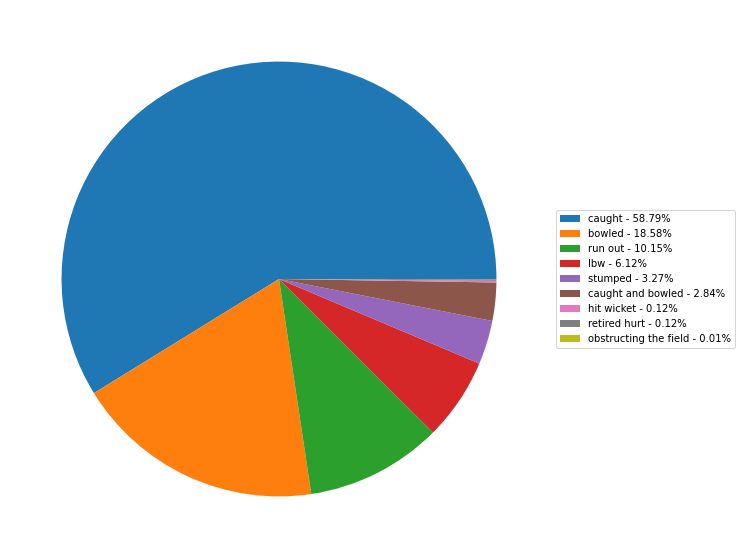

In [86]:
df2["dismissal_kind"].value_counts().plot(kind="pie",figsize=(10,10),labels=["","","","","","","","",""],ylabel="")
l=[f"{x} - {round(y*c,2)}%" for x,y in zip(a,b)]
plt.legend(labels=l,loc='center left', bbox_to_anchor=(1,0.5))